# Using matplotlib and Basemap to Plot Ash Deposition from the Mount St. Helens Volcanic Eruption

### Homework for Week 03 (Tue 26 Jan 2016)

On the Sunday morning of May 18, 1980 in south-western Washington, Mount St. Helens experienced a shallow earthquake registering a magnitude 5.1 on the Richter scale. Combined with uplifting pressure from a magma pocket below the peak, the north face of Mount St. Helens suffered a catastrophic landslide. This landslide, the largest ever recorded, aided in the release of the underground pressure and resulting in an explosive volcanic eruption which sent a column of ash over 24km (>80,000 feet) into the atmosphere. The heat from the eruption created massive lahars, volcanic mudslides created from rapidly melted glacial snow and ice mixed with volcanic lava, ash, older soil and crushed rocks. The blast itself traveled over 480km/hr (>300mph) knocking down trees and anything else that stood in its path. In the end about 60 people (reports vary from 59-64) were dead, some areas around the mountain were buried in over 600 feet of ash, a large percentage of Washington lay under more than a half a foot of ash. The ash cloud deposited measurable amounts of ash across North America and due to the amount of gas and ash deposited into the atmosphere the ash cloud. In less than 2 weeks gas and ash from the cloud circled the globe and lowered global temperatures for a short period of time.

For this homework assignment we will explore the mapping of a dataset provided to us by Jeff Falgout from the USGS (United States Geological Survey). This is a small subset of a larger dataset created by Larry Mastin (also from the USGS) which was modeled to simulate the ash cloud for the first 96 hours after the eruption. 

<b>This week we will be looking at:</b>

1. <a href="#ReadData">Read in the Data</a> - Read in a netCDF file with the Ash data.
2. <a href="KnowData">Getting to Know the Data</a> - Discover what is inside the data so we can plot it.
3. <a href="FirstPlots">The First Contour Plots</a> - Create the first couple exploratory plots of the data.
4. <a href="FirstMap">Creating the Map</a> - Create a Basemap map that will match our data.
5. <a href="AddDepo">Adding the Deposit Thickness to the Map</a> - Combine the map of North America with the ash deposition data.
6. <a href="PresentableMap">A Much More Presentable Map</a> - Creating a plot that is 'almost' journal ready.
7. <a href="SmallWorld">Its a Small World - The Final Product, First Beginnings</a> - How to create your first scientic visualization beyond simple plotting.

<a id="ReadData">
###Reading in the Data</a>

The first thing you need to do is to use Pandas to read in the data form the accompanied 'BigAsh_DepoThick.nc'.
* Create a variable called 'data' which holds the data from the netCDF file. 
* Make sure you remember to add in the inline magic command for matplotlib to plot into this notebook. 
* Add any and all the package imports you will use throughout this homework at the top of this block of code.


In [22]:
%matplotlib inline   

import urllib2
import StringIO 
import itertools 
import datetime
import numpy as np
import matplotlib.pyplot as plt
import string
import pandas as pd
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
import numpy.ma as ma
from matplotlib.colors import LinearSegmentedColormap

filename = "BigAsh_DepoThick.nc"
data = Dataset(filename, mode="r")


<a id="KnowData">
###Getting to Know the Data</a>

We have the data available but we know nothing about it thus we have no idea what we can plot with it let alone how we will define the plotting methods. Thus the first thing we need to do so become familiar with the data. 
* In the block below provide code which creates variables to hold each variable from the read in dataset.
* Print the netCDF variable name, what the variable is (eg. the netCDF variable t = time) and both the minimum and maximum values for each variable.
* Also print out how long (in hours) each timestep is.

In [23]:
time = data.variables['time'][:]
lats = data.variables['Lat'][:]
lons = data.variables['Lon'][:]
depothick = data.variables["DepoThick"][:,:,:]

print(depothick[0,:,:])

print ('time from {0} to {1}'.format(time[0], time[-1]))
print ('Times {0}'.format(time[:]))
time_min = ma.min(time)
time_max = ma.max(time)
print("The Min and Max time: min={0}, max={1}".format(time_min, time_max))

print ('\nLats {0}'.format(lats[:]))
lats_min = ma.min(lats)
lats_max = ma.max(lats)
print("The Min and Max Lats: min={0}, max={1}".format(lats_min, lats_max))

print ('\nLons {0}'.format(lons[:]))
lons_min = ma.min(lons)
lons_max = ma.max(lons)
print("The Min and Max Lons: min={0}, max={1}".format(lons_min, lons_max))


[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
time from 0.0 to 96.03845
Times [  0.        3.        6.        9.       12.       15.       18.       21.
  24.       27.       30.       33.       36.       39.       42.       45.
  48.       51.       54.       57.       60.       63.       66.       69.
  72.       75.       78.       81.       84.       87.       90.       93.
  96.       96.03845]
The Min and Max time: min=0.0, max=96.03845

Lats [ 25.125  25.375  25.625  25.875  26.125  26.375  26.625  26.875  27.125
  27.375  27.625  27.875  28.125  28.375  28.625  28.875  29.125  29.375
  29.625  29.875  30.125  30.375  30.625  30.875  31.125  31.375  31.625
  31.875  32.125  32.375  32.625  32.875  33.125  33.375  33.625  33.875
  34.125  34.375  34.625  34.875  35.125  35.375  35.625  35.875  36.125
  36.375  36.625  36.875  3

<a id="FirstPlots">
###The First Contour Plots</a>
 
* Create a contour plot of depoThick at time step 1 using 100 contour levels
* Make sure you add appropriate labels, title and color bar including any significant units of time and depth (note that depoThick is measured in mm).


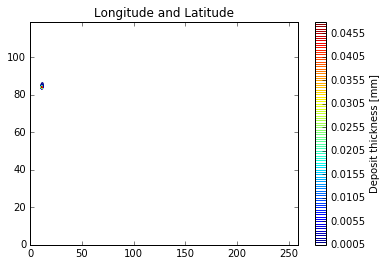

In [24]:
cp = plt.contour(depothick[1,:,:], 100)
cbar = plt.colorbar(cp)
#plt.xlim([9,13])
#plt.ylim([82,87])
cbar.set_label("Deposit thickness [mm]")
plt.title("Longitude and Latitude")

Now create the same plot this time at the last time step.

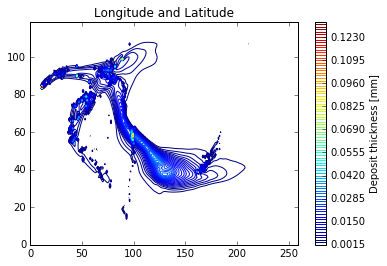

In [25]:
cp1 = plt.contour(depothick[33,:,:], 100)
cbar1 = plt.colorbar(cp1)

cbar1.set_label("Deposit thickness [mm]")
plt.title("Longitude and Latitude")

<a id="FirstMap">
###Creating the Map</a>

Using Basemap and the variables you created above, create a map of North America including the following;
* Use a Mercator mapping projection
* Coast lines with a linewidth of 1
* Country borders with a linewidth of 1
* State borders
* Fill the continent with a light grey (0.95)
* For now, just create a 'low' resolution quality for the map


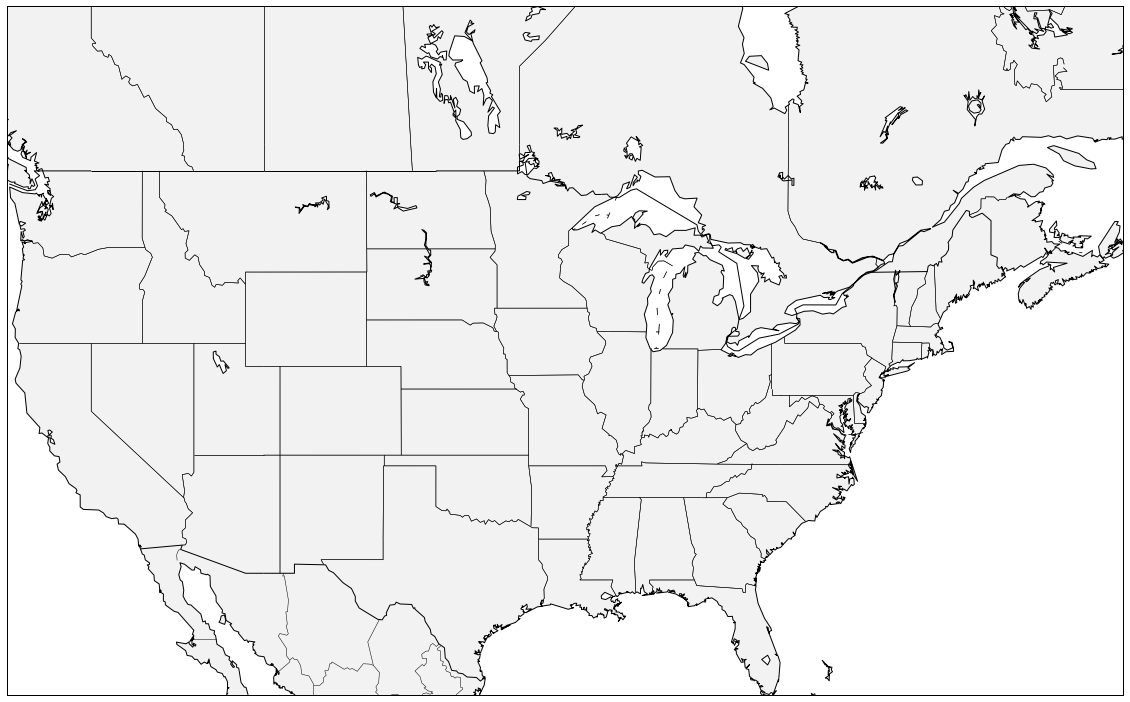

In [26]:
fig=plt.figure(figsize=(20,20))
m = Basemap(llcrnrlon=np.min(lons),llcrnrlat=np.min(lats),
            urcrnrlon=np.max(lons),urcrnrlat=np.max(lats),
            projection='merc',resolution='l', area_thresh = 1000.0)

m.drawcoastlines(linewidth=1)
m.fillcontinents(color='0.95')
m.drawcountries(linewidth=1)
m.drawstates()


<a id="AddDepo">
###Adding the Deposit Thickness to the Map</a>

Now using the map you just created add a contour plot of the ash deposition thickness.
* First you have to create a grid (use meshgrid) which has a size of [longitudes, latitudes] 
* Next get the x, y positions from your base
* Use the first time step 
* Use 100 contour levels

If you did things right, then the initial ash deposition will match the actual location of Mount St. Helens in south-western Washington.

NOTE: If you experience slow to know performance due to memory issues (this is a function of running the Notebook) then copy the code to create your lat and lon variables and your Basemap from above to your new code below.


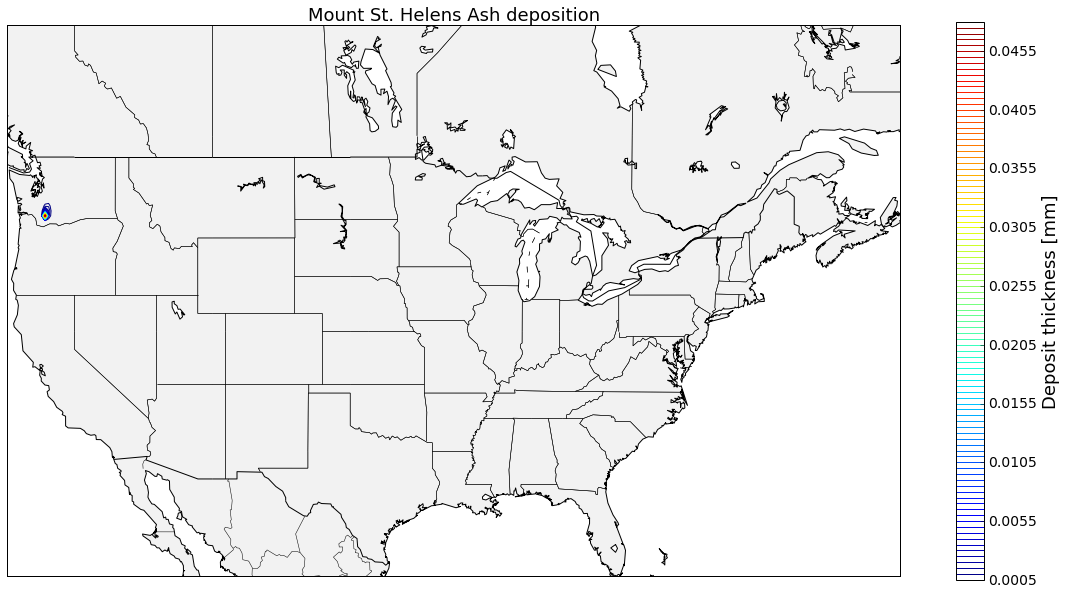

In [39]:
fig=plt.figure(figsize=(20,20))
m = Basemap(llcrnrlon=np.min(lons),llcrnrlat=np.min(lats),
            urcrnrlon=np.max(lons),urcrnrlat=np.max(lats),
            projection='merc',resolution='l', area_thresh = 1000.0)

m.drawcoastlines(linewidth=1)
m.fillcontinents(color='0.95')
m.drawcountries(linewidth=1)
m.drawstates()

plons, plats = np.meshgrid(lons, lats)
x, y = m(plons, plats)
cp2 = m.contour(x,y,depothick[1,:,:], 100)
cbar2 = plt.colorbar(cp2, shrink=0.5)
cbar2.ax.tick_params(labelsize=14)
cbar2.set_label("Deposit thickness [mm]", fontsize=18)
plt.title("Mount St. Helens Ash deposition", fontsize=18)
plt.show()


<a id="PresentableMap">
###A Much More Presentable Map</a>

* Create a figure that fits the width of the Notebook
* Use the last time step
* Use 500 contour levels
* Add in both parallels and meridians
* Fill the continent with a light grey (0.95)
* Fill all waters with an 'Aqua' color
* Add title, labels, colorbar and make sure all font sizes are easily readable to someone sitting at the back of an auditorium.


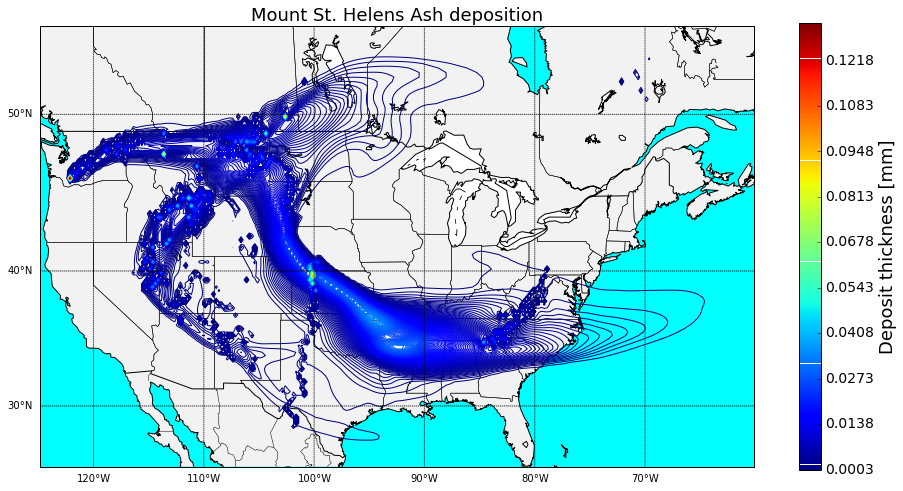

In [28]:
fig=plt.figure(figsize=(16,16))
m = Basemap(llcrnrlon=np.min(lons),llcrnrlat=np.min(lats),
            urcrnrlon=np.max(lons),urcrnrlat=np.max(lats),
            projection='merc',resolution='l', area_thresh = 1000.0)

m.drawcoastlines(linewidth=1)
m.fillcontinents(color='0.95')
m.drawmapboundary(fill_color='aqua')
m.drawcountries(linewidth=1)
m.drawstates()
m.drawmeridians(np.arange(-300, 0, 10), labels=[0,0,0,1])
m.drawparallels(np.arange(0, 90, 10), labels=[1,0,0,0])

plons, plats = np.meshgrid(lons, lats)
x, y = m(plons, plats)
cp2 = m.contour(x,y,depothick[33,:,:], 500)
cbar2 = plt.colorbar(cp2, shrink=0.5)
cbar2.ax.tick_params(labelsize=14)
cbar2.set_label("Deposit thickness [mm]", fontsize=18)
plt.title("Mount St. Helens Ash deposition", fontsize=18)

<a id="SmallWorld">
###It's a Small World - The Final Product, First Beginnings</a>

For the final plot it's all about the eye candy. The above plot is approaching something you can use for a scientific paper but what if you wanted to present this information to a live audience? To engage (spelled keep awake) people at conferences or other forms of presentations (think about your project) you need to jump to the next step and while I called it eye candy it also opens the viewers mind to a larger more encompassing thought process. So once completed with this last plot take a look at the one above and this next one and spend a few minutes reviewing how you 'feel' when you look at each!

So for this last one we are going global and make the Earth look like, well Earth! 
* Create a new map this time using a Near-Sided Perspective Projection using the following;
 * Projection = nsper
 * Longitude view position = -105
 * Latitude view position = 40
 * Satellite height = 3000 km 
 * Resolution = full
 * Texture the map with NASA's 'bluemarble' map
 * Add in both parallels and meridians 
 
* Add in a filled contour plot 
* Set the timestep to the last timestep
* Set the contour levels to 700
* Create new colormap for the contourf plot using matplotlib's "YlOrBr_r" color map (note the '_r' indicates it's the reverse of the normal "YlOrBr" color map.) 
 * Set the under value for the color map to a white color with an alpha value of 0.
 * Set the lower and upper limits for the color map to (0.001, 0.12). 
 * The net effect of these last two settings is that it clamps the values mapped from the data to the color map such that any value below 0.001 will be transparent thus we will see just the contours we want and not a big block of color blocking our map.
 * This is not the best color map we can use but we will spend A LOT of time talking about coloring later in the semester.
 
Note this will take a few seconds to render everything for you!


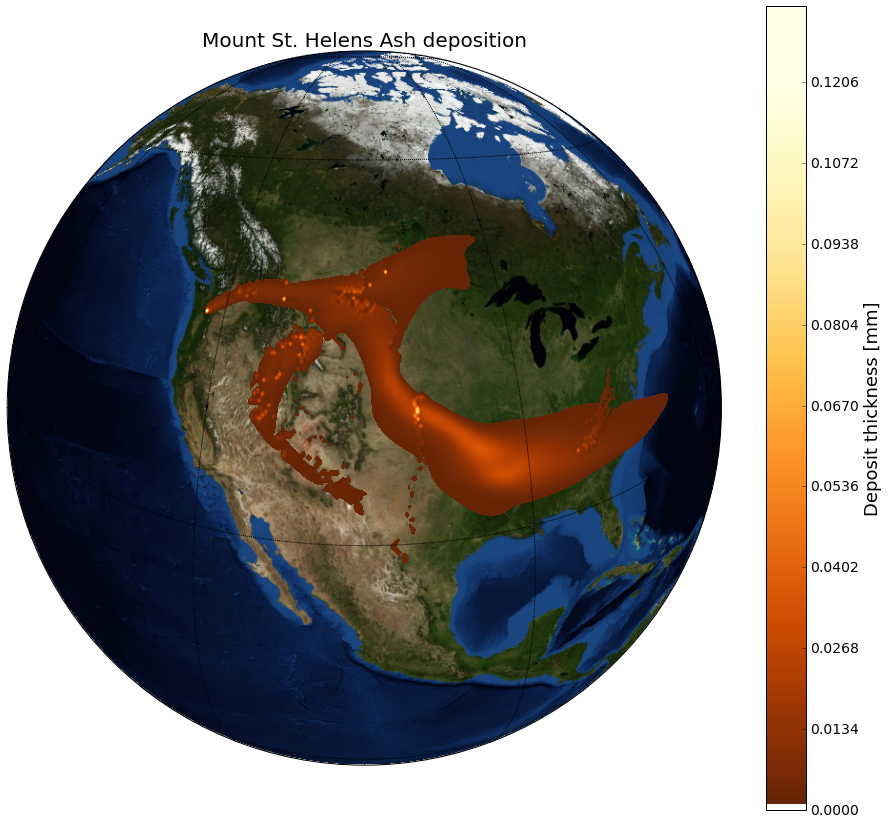

In [43]:
fig=plt.figure(figsize=(16,16))
m = Basemap(projection='nsper', resolution='f', lat_0=40, lon_0=-105, satellite_height=3000000)

m.bluemarble()
m.drawmeridians(np.arange(0, 360, 30))
m.drawparallels(np.arange(-90, 90, 30))

colorMap = plt.cm.get_cmap('YlOrBr_r')
#colorMap.set_under("white", alpha=0)
#colorMap.set_clim(vmin=0.001, vmax=0.12)

plons, plats = np.meshgrid(lons, lats)
x, y = m(plons, plats)
cp2 = m.contourf(x,y,depothick[33,:,:], 700, cmap=colorMap)
cp2.cmap.set_under("w", alpha=0)
cp2.set_clim(vmin=0.001, vmax=0.12)

#cbar2 = plt.colorbar(cp2, shrink=0.9)
cbar2.ax.tick_params(labelsize=14)
cbar2.set_label("Deposit thickness [mm]", fontsize=18)
plt.title("Mount St. Helens Ash deposition", fontsize=20)